In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 문제 기반 실무 학습(PBL) 개요

In [18]:
import pandas as pd

# CSV 파일에서 데이터셋 로드
data = pd.read_csv('/content/drive/MyDrive/test/townhouse_train.csv', encoding='utf-8')

# 삭제할 칼럼 리스트
columns_to_drop = [
    'Region_강남구', 'Region_강동구', 'Region_강북구', 'Region_강서구',
    'Region_관악구', 'Region_광진구', 'Region_구로구', 'Region_금천구',
    'Region_노원구', 'Region_도봉구', 'Region_동대문구', 'Region_동작구',
    'Region_마포구', 'Region_서대문구', 'Region_서초구', 'Region_성동구',
    'Region_성북구', 'Region_송파구', 'Region_양천구', 'Region_영등포구',
    'Region_용산구', 'Region_은평구', 'Region_종로구', 'Region_중구', 'Region_중랑구'
]

# 칼럼 삭제
data.drop(columns=columns_to_drop, inplace=True)


# 결과 확인
print(data.head(3))

   Building_Age  JS_Price  JS_BA  Population  LC_index  TC_index   SDT_index  \
0            10     23000  64.64      557563      72.0      74.2  113.800797   
1             1     17000  45.63      486546      72.0      74.2  114.099106   
2            17     12000  49.46      486546      72.0      74.2  112.765800   

   Sell_Price  Crime_Rates    IR  Year  Month  Shortest_Distance_to_Subway  \
0     35000.0     1.466284  2.75  2011      1                   816.989380   
1     24500.0     0.942699  2.75  2011      1                   957.106297   
2     19950.0     1.098977  2.75  2011      1                   648.569915   

   Shortest_Distance_to_University  Shortest_Distance_to_School  
0                      2469.693605                   411.014080  
1                      3034.365920                   357.122247  
2                      2002.767428                   497.931692  


In [19]:
# 새로운 CSV 파일로 저장
data.to_csv('/content/drive/MyDrive/test/townhouse_train.csv', index=False, encoding='utf-8')

# 문제 및 모델링의 이해

In [20]:
import pandas as pd

In [34]:
train = pd.read_csv('/content/drive/MyDrive/test/apt_train.csv')
test = pd.read_csv('/content/drive/MyDrive/test/apt_test.csv')

## 1. 변수 조사 및 기술적 통계

In [35]:
# 1. train 데이터를 describe()를 사용하여 요약
train.describe()

,Building_Age,JS_BA,Population,LC_index,TC_index,SDT_index,Sell_Price,Crime_Rates,IR,Year,Month,Shortest_Distance_to_Subway,Shortest_Distance_to_University,Shortest_Distance_to_School
count,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000
mean,17.819760,75.275829,452632.495747,88.377433,90.389797,108.261979,64305.421689,1.057329,1.942945,2016.284346,6.225932,659.196104,1992.079083,269.057957
std,10.309371,25.538760,118859.877165,11.530819,10.248766,13.682284,34769.629643,0.374825,0.881771,3.511797,3.445635,408.196788,1333.080768,136.261134
min,-7.000000,10.780000,119206.000000,72.000000,74.200000,66.522876,7100.000000,0.538415,0.500000,2011.000000,1.000000,0.000000,24.675602,24.166165
25%,9.000000,59.540000,367014.000000,78.000000,81.700000,102.176471,37400.000000,0.823036,1.250000,2013.000000,3.000000,366.057171,931.030405,172.677761
50%,18.000000,77.710000,446398.000000,87.500000,89.500000,112.917271,55500.000000,0.965345,1.750000,2016.000000,6.000000,577.231251,1687.589545,236.814226
75%,26.000000,84.960000,554870.000000,96.300000,98.500000,116.815742,84500.000000,1.203350,2.750000,2019.000000,9.000000,872.891274,2746.636250,346.931660
max,53.000000,244.970000,674828.000000,111.100000,113.900000,133.623749,166518.180000,3.845650,3.500000,2023.000000,12.000000,3101.681180,7102.619311,1257.271489


## 2. 모델링을 위한 데이터셋 준비(Train/Test)

In [ ]:
X = train.drop('JS_Price',axis = 1)
y = train[['JS_Price']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split()을 이용하여 데이터를 분리합니다. (단, test_size는 0.2, random_state는 42로 설정합니다)
train_X, test_X, train_Y, test_Y = train_test_split( X, y, test_size=0.2, random_state=42)

## 3. 기초 모델링 : 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

1. lrmodel 변수에 선형회귀 모델을 선언
2. lrmodel에 train_X, train_Y를 fit 합니다.

In [ ]:
# 1. lrmodel 변수에 선형회귀 모델을 선언합니다.
lrmodel = LinearRegression()

In [ ]:
# 2. lrmodel에 train_X, train_Y를 fit 합니다.
lrmodel.fit(train_X, train_Y)

학습을 완료하고 나서 실제 우리의 모델이 얼마나 완벽한지 확인

In [ ]:
# RSME 성능평가 계산을 위한 라이브러리
from sklearn.metrics import mean_squared_error

In [ ]:
def RMSE(y, y_pred):
  '''
  MSE에 제곱근을 취하는 함수
  '''
  rmse = mean_squared_error(y, y_pred) ** 0.5
  return rmse

In [ ]:
print(RMSE(lrmodel.predict(train_X), train_Y))
print(RMSE(lrmodel.predict(test_X), test_Y))

### shape 함수로 데이의 행과 열을 확인

In [ ]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

# EDA 기반 시각화 및 가공

In [ ]:
# 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 1. 변수별 특징 및 예측값과의 관계 시각화

In [27]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/test/apt_train.csv')
test = pd.read_csv('/content/drive/MyDrive/test/apt_test.csv')

In [28]:
train.head(3)

,Building_Age,JS_BA,Population,LC_index,TC_index,SDT_index,Sell_Price,Crime_Rates,IR,Year,Month,Shortest_Distance_to_Subway,Shortest_Distance_to_University,Shortest_Distance_to_School
0,15,59.97,299533,72.0,74.2,114.099327,31400.00,0.930480,2.75,2011,1,744.388888,1783.606149,370.003165
1,32,84.43,557563,72.0,74.2,113.009872,100404.17,0.842083,2.75,2011,1,839.698707,3723.160551,336.123079
2,14,59.82,368260,72.0,74.2,113.009872,56836.67,0.836749,2.75,2011,1,351.857009,1517.638732,470.686016


사용하지 않는 법정동명, 자치구명, 거래일자 컬럼을 제외

In [29]:
drop_col = ['Year', 'Month']
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

### 1-1. 변수별 특징

연속형 변수를 골라서 `cont_col`에 선언할게요.<br>
연속형 변수로는 `전용면적, 아파트 실거래가, 인구밀도, 기준금리, 전세가격, 주변 역 개수, 주변 자율형사립고등학교 개수, 졸업생 수, 공원 개수, 어린이집 개수`

In [31]:
cont_col=['Building_Age','JS_BA', 'Population', 'LC_index','TC_index','SDT_index','Sell_Price','IR','Shortest_Distance_to_Subway','Shortest_Distance_to_University', 'Shortest_Distance_to_School']

train[cont_col].describe()

,Building_Age,JS_BA,Population,LC_index,TC_index,SDT_index,Sell_Price,IR,Shortest_Distance_to_Subway,Shortest_Distance_to_University,Shortest_Distance_to_School
count,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000,93453.000000
mean,17.819760,75.275829,452632.495747,88.377433,90.389797,108.261979,64305.421689,1.942945,659.196104,1992.079083,269.057957
std,10.309371,25.538760,118859.877165,11.530819,10.248766,13.682284,34769.629643,0.881771,408.196788,1333.080768,136.261134
min,-7.000000,10.780000,119206.000000,72.000000,74.200000,66.522876,7100.000000,0.500000,0.000000,24.675602,24.166165
25%,9.000000,59.540000,367014.000000,78.000000,81.700000,102.176471,37400.000000,1.250000,366.057171,931.030405,172.677761
50%,18.000000,77.710000,446398.000000,87.500000,89.500000,112.917271,55500.000000,1.750000,577.231251,1687.589545,236.814226
75%,26.000000,84.960000,554870.000000,96.300000,98.500000,116.815742,84500.000000,2.750000,872.891274,2746.636250,346.931660
max,53.000000,244.970000,674828.000000,111.100000,113.900000,133.623749,166518.180000,3.500000,3101.681180,7102.619311,1257.271489


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# train의 'JS_Price'를 sns를 통해 plot 해보세요
sns.distplot(train['JS_Price'])

# 그래프의 title을 Distribution of target variable(JS_Price)로 설정하고 show 해보세요
plt.title(f'Distribution of target variable(JS_Price)')
plt.show()

KeyError: ignored

## 1. 변수별 특징 및 예측값과의 관계 시각화

In [30]:
import pandas as pd
import numpy as np

In [2]:
def evaluate_model(y_true, y_pred):
  """
  연속 분류 지표로 모델의 성능을 평가하는 함수

  Args:
    y_true : 실제 값
    y_pred : 예측 값

  """

  # 평균 제곱 오차(MSE) 계산
  mse = np.mean((y_true - y_pred) ** 2)

  # 평균 절대 오차(MAE) 계산
  mae = np.mean(np.abs(y_true - y_pred))

  # 근사 오차(RMSE) 계산
  rmse = np.sqrt(mse)

  # 결정계수(R^2) 계산
  y_bar = np.mean(y_true)
  ss_tot = np.sum((y_true - y_bar) ** 2)
  ss_res = np.sum((y_true - y_pred)  ** 2)
  r2 = 1 - ss_res / ss_tot

  # 평균 절대 백분율 오차(MAPE) 계산
  mape = 100 * np.mean(np.abs(y_true - y_pred) / y_true)
  print('-------------------------------------')
  print("평균 제곱 오차(MSE) : {0}\n평균 절대 오차(MAE) : {1}\n근사 오차(RMSE) : {2}\n결정계수(R^2) : {3}\n평균 절대 오차(MAPE) : {4}".format(mse, mae, rmse, r2, mape))
  print('-------------------------------------')

# 파일 전처리

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/semi_project/data_officetel.csv", encoding='cp949')
data.head(3)

,Year,Month,Building_Age,JS_Price,JS_BA,Population,LC_index,TC_index,SDT_index,Sell_Price,...,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구,Shortest_Distance_to_Subway,Shortest_Distance_to_University,Shortest_Distance_to_School
0,2011,1,20,7000,22.77,557563,72.0,74.2,112.372055,9250.00,...,0,0,0,0,0,0,0,625.868025,1450.060983,405.257077
1,2011,1,8,13000,40.56,557563,72.0,74.2,114.326378,24400.00,...,0,0,0,0,0,0,0,730.847519,469.699738,548.727230
2,2011,1,6,22000,57.27,557563,72.0,74.2,112.364861,33733.33,...,0,0,0,0,0,0,0,452.912989,1360.509083,154.541041


In [ ]:
# 'Year'와 'Month' 칼럼을 합쳐서 'Date' 칼럼 생성
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# 'Date' 칼럼을 인덱스로 설정 (시계열 데이터로 만듦)
data.set_index('Date', inplace=True)

# 'Year'와 'Month' 칼럼 삭제
data.drop(['Year', 'Month'], axis=1, inplace=True)

# 결과 확인
print(data.head())


            Building_Age  JS_Price  JS_BA  Population  LC_index  TC_index  \
Date                                                                        
2011-01-01            20      7000  22.77      557563      72.0      74.2   
2011-01-01             8     13000  40.56      557563      72.0      74.2   
2011-01-01             6     22000  57.27      557563      72.0      74.2   
2011-01-01             7     14000  35.34      557563      72.0      74.2   
2011-01-01             4     14000  56.04      486546      72.0      74.2   

             SDT_index  Sell_Price  Crime_Rates    IR  ...  Region_양천구  \
Date                                                   ...               
2011-01-01  112.372055     9250.00     1.204801  2.75  ...           0   
2011-01-01  114.326378    24400.00     1.492879  2.75  ...           0   
2011-01-01  112.364861    33733.33     1.207107  2.75  ...           0   
2011-01-01  112.765800    19500.00     1.095930  2.75  ...           0   
2011-01-01  114.

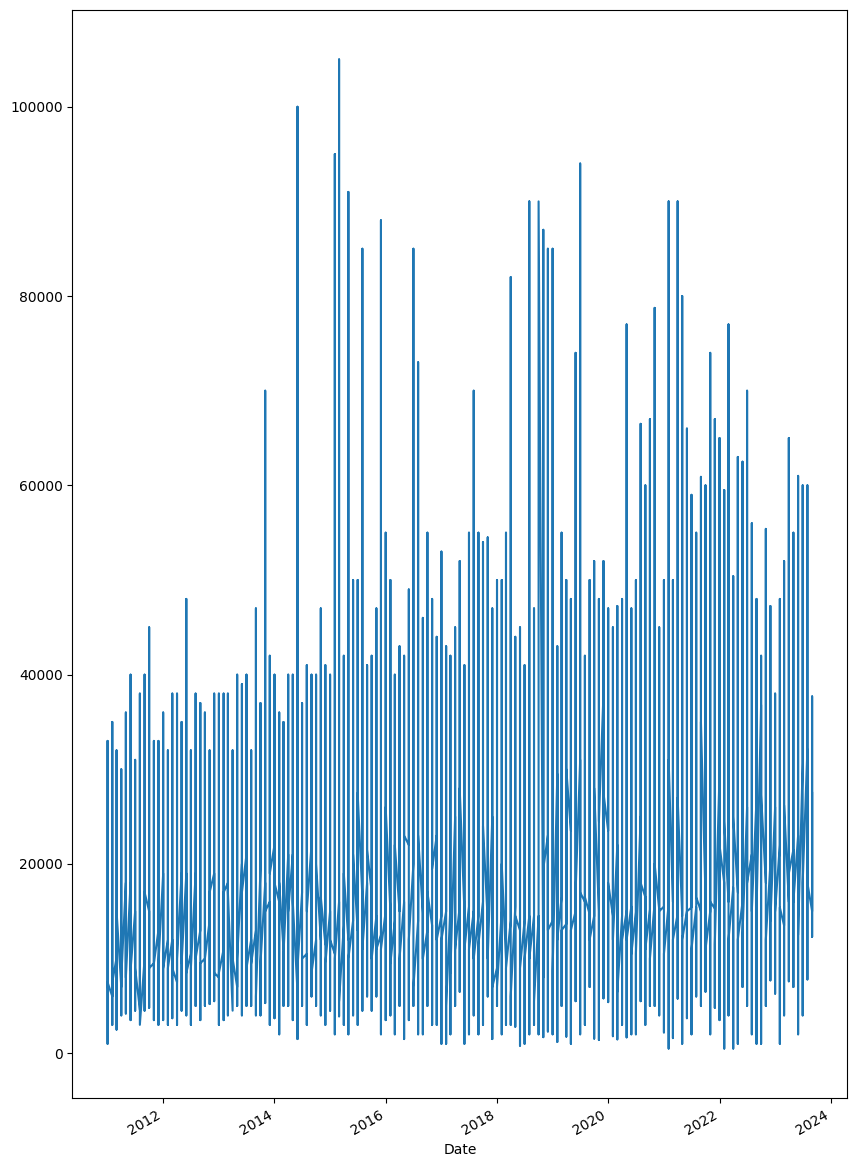

In [ ]:
import matplotlib.pyplot as plt

data['JS_Price'].plot(subplots=True, figsize = (10,16))
plt.show()

# LightGBM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

# CSV 파일에서 데이터셋 로드
data = pd.read_csv('/content/drive/MyDrive/semi_project/data_officetel.csv', encoding='utf-8')

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=414)

# Initialize a LightGBM regressor object
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=1000)

# Fit the model to the training data
lgb_model.fit(X_train.values, y_train)

# Make predictions on the test data
y_pred_lgb_model = lgb_model.predict(X_test.values)

# Evaluate the model performance
rmse_lgb_model = np.sqrt(mean_squared_error(y_test, y_pred_lgb_model))
mape_lgb_model = np.mean(np.abs((y_test - y_pred_lgb_model) / y_test)) * 100

evaluate_model(y_test, y_pred_lgb_model)
print('rmse_lgb_model : ', rmse_lgb_model)
print('mape_lgb_model : ', mape_lgb_model)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2613
[LightGBM] [Info] Number of data points in the train set: 58116, number of used features: 39
[LightGBM] [Info] Start training from score 18740.796751
-------------------------------------
평균 제곱 오차(MSE) : 6221575.494868401
평균 절대 오차(MAE) : 1585.7281693914347
근사 오차(RMSE) : 2494.308620613817
결정계수(R^2) : 0.8844715194113324
평균 절대 오차(MAPE) : 10.123257486618414
-------------------------------------
rmse_lgb_model :  2494.308620613817
mape_lgb_model :  10.123257486618414


# 이거 사용하시면 됩니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

# CSV 파일에서 데이터셋 로드
data = pd.read_csv('/content/drive/MyDrive/semi_project/data_APT.csv', encoding='utf-8')

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=414)

# Define the hyperparameter search space
hyperparameter_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'num_leaves': np.arange(32, 128, 32),
    'max_depth': np.arange(-1, 10, 1),
    'reg_alpha': np.arange(0.0, 1, 0.1),
    'reg_lambda': np.arange(0.0, 1, 0.1)
}

# Initialize a RandomizedSearchCV object
lgb_model_rscv = RandomizedSearchCV(
    lgb.LGBMRegressor(random_state=1000),
    hyperparameter_grid,
    cv=5,
    n_iter=300,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model to the training data
lgb_model_rscv.fit(X_train.values, y_train)

# Make predictions on the test data
y_pred_lgb_model_rscv = lgb_model_rscv.best_estimator_.predict(X_test.values)

# Evaluate the model performance
rmse_lgb_model_rscv = np.sqrt(mean_squared_error(y_test, y_pred_lgb_model_rscv))
mape_lgb_model_rscv = np.mean(np.abs((y_test - y_pred_lgb_model_rscv) / y_test)) * 100

evaluate_model(y_test, y_pred_lgb_model_rscv)

# LightGBM(RandomizedSeracCV)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

# CSV 파일에서 데이터셋 로드
data = pd.read_csv('/content/drive/MyDrive/semi_project/data_APT.csv', encoding='utf-8')

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=414)

# Define the hyperparameter search space
hyperparameter_grid = {
    'n_estimators': np.arange(100, 1500, 100),
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'num_leaves': np.arange(32, 256, 32),
    'max_depth': np.arange(-1, 15, 1),
    'reg_alpha': np.arange(0, 3, 0.1),
    'reg_lambda': np.arange(0, 3, 0.1)
}

# Initialize a RandomizedSearchCV object
lgb_model_rscv = RandomizedSearchCV(
    lgb.LGBMRegressor(random_state=1000),
    hyperparameter_grid,
    cv=5,
    n_iter=300,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model to the training data
lgb_model_rscv.fit(X_train.values, y_train)

# Make predictions on the test data
y_pred_lgb_model_rscv = lgb_model_rscv.best_estimator_.predict(X_test.values)

# Evaluate the model performance
rmse_lgb_model_rscv = np.sqrt(mean_squared_error(y_test, y_pred_lgb_model_rscv))
mape_lgb_model_rscv = np.mean(np.abs((y_test - y_pred_lgb_model_rscv) / y_test)) * 100

evaluate_model(y_test, y_pred_lgb_model_rscv)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

# CSV 파일에서 데이터셋 로드
data = pd.read_csv('/content/drive/MyDrive/semi_project/data_officetel.csv', encoding='utf-8')

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=414)

# Define the hyperparameter search space
hyperparameter_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'num_leaves': np.arange(32, 128, 32),
    'max_depth': np.arange(-1, 10, 1),
    'reg_alpha': np.arange(0, 1, 0.1),
    'reg_lambda': np.arange(0, 1, 0.1)
}

# Initialize a RandomizedSearchCV object
lgb_model_rscv = RandomizedSearchCV(
    lgb.LGBMRegressor(random_state=1000),
    hyperparameter_grid,
    cv=5,
    n_iter=100,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model to the training data
lgb_model_rscv.fit(X_train.values, y_train)

# Make predictions on the test data
y_pred_lgb_model_rscv = lgb_model_rscv.best_estimator_.predict(X_test.values)

# Evaluate the model performance
rmse_lgb_model_rscv = np.sqrt(mean_squared_error(y_test, y_pred_lgb_model_rscv))
mape_lgb_model_rscv = np.mean(np.abs((y_test - y_pred_lgb_model_rscv) / y_test)) * 100

evaluate_model(y_test, y_pred_lgb_model_rscv)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2613
[LightGBM] [Info] Number of data points in the train set: 58116, number of used features: 39
[LightGBM] [Info] Start training from score 18740.796751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
-------------------------------------
평균 제곱 오차(MSE) : 4801335.5284143705
평균 절대 오차(MAE) : 1316.5376487335382
근사 오차(RMSE) : 2191.1950000888487
결정계수(R^2) : 0.9108439656721015
평균 절대 오차(MAPE) : 8.460566343494168
-------------------------------------


# 모델 저장

In [ ]:
import pickle

# 저장할 모델 파일 이름
model_filename = 'townhouse_lgb_model.pkl'

# 모델 저장
with open(model_filename, 'wb') as model_file:
    pickle.dump(lgb_model_rscv.best_estimator_, model_file)

# 모델 불러오기
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# 예측을 위해 불러온 모델 사용
y_pred_loaded_model = loaded_model.predict(X_test.values)

evaluate_model(y_test, y_pred_loaded_model)


-------------------------------------
평균 제곱 오차(MSE) : 10469302.140207347
평균 절대 오차(MAE) : 2157.484170685933
근사 오차(RMSE) : 3235.6300994099042
결정계수(R^2) : 0.8491149706485761
평균 절대 오차(MAPE) : 15.407659159548853
-------------------------------------


# 오피스텔 시각화

## 하이퍼파라미터 튜닝 결과 시각화

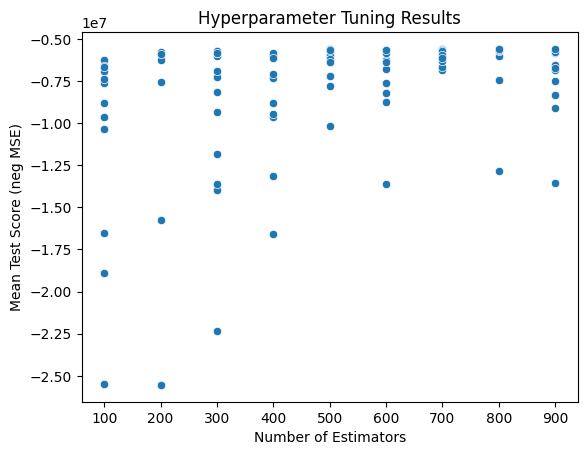

Best Hyperparameters: {'reg_lambda': 0.8, 'reg_alpha': 0.1, 'num_leaves': 64, 'n_estimators': 700, 'max_depth': -1, 'learning_rate': 0.060000000000000005}


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# RandomizedSearchCV 결과를 DataFrame으로 변환
results = pd.DataFrame(lgb_model_rscv.cv_results_)

# 원하는 하이퍼파라미터를 x, y 축으로 설정하여 시각화
plt.figure(figsize=(12, 6))

# 예시: n_estimators와 learning_rate 조합에 따른 RMSE 시각화
sns.scatterplot(x='param_n_estimators', y='param_learning_rate', hue='mean_test_score', data=results, cmap='viridis')
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.title('Hyperparameter Tuning Results (Color-coded by RMSE)')
plt.colorbar(label='Mean Test Score (neg MSE)')
plt.show()

## 실제 vs 예측값 비교 그래프
- 그래프 설명
  - X축 : 실제값(Actual Values) / Y축 : 예측값(Predicted Values)
  - 각 점은 데이터 포인트를 나타내며, X와 Y 좌표는 해당 데이터 포인트의 실제값과 모델에 의한 예측값을 나타냅니다.
  - 이 그래프의 주요 목적은 점들이 대각선(45도 각도) 주위에 어떻게 분포하는지 확인하는 것입니다. 대각선은 실제값과 예측값이 정확하게 일치하는 경우를 나타냅니다.

- 그래프 해석
  - 대각선 위에 있는 점들은 모델이 예측을 정확하게 수행한 경우.
  - 대각선 아래에 있는 점들은 모델의 예측이 부정확한 경우를 나타내며, 이 경우 모델이 실제값을 과소 또는 과대 평가한 것일 수 있습니다.
  - 그래프의 분산 정도와 점들의 집중 정도는 모델의 예측 정화도를 나타냅니다.분산이 크고 점들이 대각선에서 멀리 떨어져 있다면 모델의 예측이 불안정하거나 부정확할 수 있습니다.

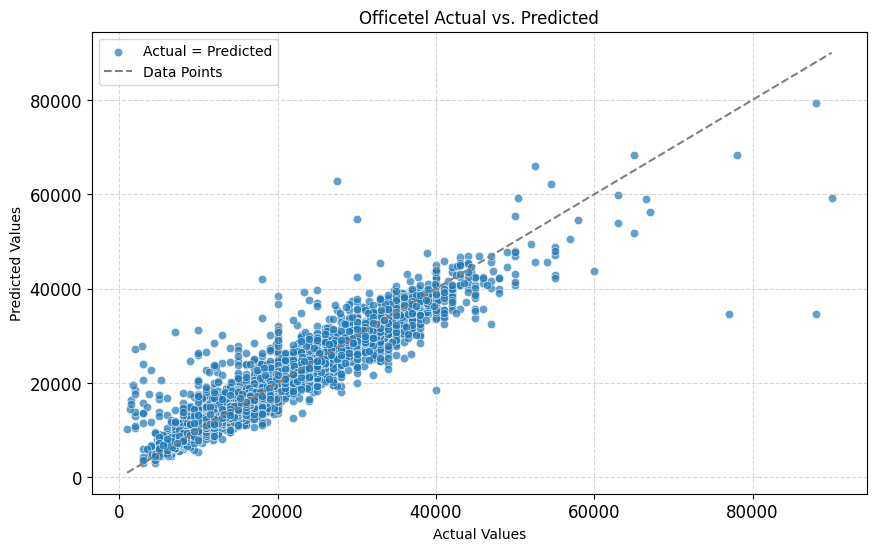

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제값과 예측값을 데이터프레임으로 만들기
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lgb_model_rscv})

# 산점도 그래프 (Scatter plot) 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, alpha=0.7)  # alpha는 점의 투명도 조절
plt.title('Officetel Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# 대각선 추가 (실제값과 예측값이 일치하는 경우)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')

# 그래프 범례 추가
plt.legend(['Actual = Predicted', 'Data Points'])

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.5)

# x, y 축 라벨에 큰 폰트 추가
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 저장 (선택 사항)
# plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# CSV 파일에서 데이터셋 로드
data = pd.read_csv('/content/drive/MyDrive/semi_project/data_officetel.csv', encoding='utf-8')

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=414)

# Initialize an XGBoost regressor object
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=1000)

# Fit the model to the training data
xgb_model.fit(X_train.values, y_train)

# Make predictions on the test data
y_pred_xgb_model = xgb_model.predict(X_test.values)

# Evaluate the model performance
rmse_xgb_model = np.sqrt(mean_squared_error(y_test, y_pred_xgb_model))
mape_xgb_model = np.mean(np.abs((y_test - y_pred_xgb_model) / y_test)) * 100

# Print evaluation metrics
print('RMSE (XGBoost): ', rmse_xgb_model)
print('MAPE (XGBoost): ', mape_xgb_model)
